<a href="https://colab.research.google.com/github/DomTHK/DLO_Lab/blob/main/DLO_Aufg4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aufgabe 4

Gegeben sind die vier Punkte (1, 1), (3,4), (6, 2), (7, 3).
* Wie lautet Ihre Fehlerfunktion L, die aussagt, wie sehr ein
Polynom ˆy(x) = a0 + a1x + a2x
2 + . . . + ad x
d mit Grad d die
Punkte verfehlt?
* Wie sehen dann die partiellen Ableitungen nach a0, a1, usw.
aus?
* Nutzen Sie Gradientenabsteig, um Polynome verschiedenen
Grades an die Punkte zu fitten
* Achtung: Initialisierung der ai sowie Schrittweite η haben
großen Einfluss!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
#was wird gemacht?
# 0) Funktion auswählen [besser gesagt anzahl Polynome]
# 1) 4 mal 'y_' für jedes der 4 'x' berechnen
# 2) y_ mit y vergleichen, differenz berechnen, ableitung berechnen, a (=gewichtsvektor) anpassen
# 3) Dies für alle gewünschten Polynomgrade wiederholen

def calc_y(x, a, grades, k, i):                                                                                                                                                   
    y = 0
    for j in range(int(grades[i])+1): 
      y = y + a[i, j] * x[k]**j 
      #print(j)
    return y

def calc_y_(x, a, grades, k, i):                                      #für jedes der 4 'x' jeweils 'y_' berechnen und Gradientenabstieg durchführen                                                                                                              
    y_ = 0
    for j in range(int(grades[i])+1): y_ = y_ + a[i, j] * x[k, 0]**j  #calculate 'y' for the chosen 'x', based on function         
    #print(a[i, j])
    #print('y,ai,\nxk:',i,  y_, a[i, :], x[k, 0])
    return y_

def perform_gd(y_, x, lr, a, i, k, grades):
    L = y_ - x[k, 1]                                               #calculate loss based on calculated y
    #print('before:', a[i,:])
    for l in range(int(grades[i])+1): a[i, l] = a[i, l] - (lr/((10**l)*(1+l))) * L * x[k,0]**l    #perform gradient-descent 
    #print('after:', a[i,:])
    return a

def fit_polynom(x, grades, n_epochs, lr):
    a = np.full((len(grades), np.max(grades)+1), 0.9)
    #a = np.matrix([[0.1, 3, 3, 5/10, 5/100],
    #               [0.1, 3, 3, 5/10, 5/100],
    #               [0.1, 3, 3, 5/10, 5/100]])
    for i in range(len(grades)):                                       #Eine Iteration steht für eine Funktion eines best. Grades 
        for e in range(n_epochs):                                      #über e Iterationen laufen lassen
            for k in range(len(x)):                                    #change weights for one 'x' at a time
                for h in range(len(grades)):
                  y_ = 0
                  y_ = calc_y_(x, a, grades, k, i)                       #Einmal die y-Werte der Funktion mit aktuellen a1..ad berechnen
                  a = perform_gd(y_, x, lr, a, i, k, grades)
        print(a)
    return a                                                                                      
          

    
         

In [69]:
b = np.matrix([[3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05],
 [3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05],
 [3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05]])

print(np.mean(b))

3.000000000000001e-05


[[-4.25174103  6.93835584 -1.81440986  0.1387278   0.9         0.9       ]
 [ 0.9         0.9         0.9         0.9         0.9         0.9       ]
 [ 0.9         0.9         0.9         0.9         0.9         0.9       ]]
[[-4.25174103  6.93835584 -1.81440986  0.1387278   0.9         0.9       ]
 [-1.78927602  2.85142965  0.121351   -0.20382784  0.02032321  0.9       ]
 [ 0.9         0.9         0.9         0.9         0.9         0.9       ]]
[[-4.25174103e+00  6.93835584e+00 -1.81440986e+00  1.38727800e-01
   9.00000000e-01  9.00000000e-01]
 [-1.78927602e+00  2.85142965e+00  1.21351002e-01 -2.03827839e-01
   2.03232062e-02  9.00000000e-01]
 [ 5.31963781e-01 -1.48840798e-01  5.72374084e-01  1.09020037e-01
  -7.09710331e-02  6.45392808e-03]]


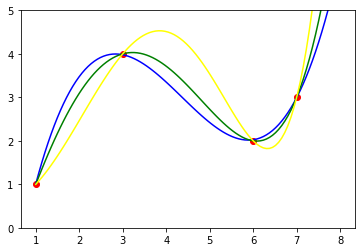

In [111]:
#initializing
x = np.array([[1, 1], 
              [3, 4], 
              [6, 2], 
              [7, 3]])
grades = np.array([[3], [4], [5]])
n_epochs = 100000
lr = 0.0078

#training
a = fit_polynom(x, grades, n_epochs, lr)

#plotting
x_range = np.linspace(1, 8, num=100)
y_ = np.full((100, 3), 0.0)

for k in range(100):
    for j in range(3): y_[k, j] = calc_y(x_range, a, grades, k, j)

color = (['blue', 'green', 'yellow'])
for h in range(3): plt.plot(x_range, y_[:, h], color = color[h]) 
plt.ylim(0, 5)
plt.scatter(x[:,0], x[:,1], color='red')
plt.show()
